# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from time import ctime as convert

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cityname=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat = []
lng=[]
max_temp = []
windspeed=[]

#setup counter
count=1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        cityname.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        #date.append(convert(int(response['dt'])))
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing Record for city number {count}, {city}.")
        count= count +1
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")


Processing Record for city number 1, vaini.
------------
Processing Record for city number 2, khatanga.
------------
Processing Record for city number 3, port alfred.
------------
Processing Record for city number 4, albany.
------------
Processing Record for city number 5, talcahuano.
------------
Processing Record for city number 6, mar del plata.
------------
Processing Record for city number 7, san jose de buan.
------------
Processing Record for city number 8, new norfolk.
------------
Processing Record for city number 9, rikitea.
------------
Processing Record for city number 10, hermanus.
------------
Processing Record for city number 11, cape town.
------------
Processing Record for city number 12, maniitsoq.
------------
Missing field/result... skipping.
------------
Processing Record for city number 13, stornoway.
------------
Processing Record for city number 14, bredasdorp.
------------
Processing Record for city number 15, bengkulu.
------------
Processing Record for city 

Processing Record for city number 129, pangnirtung.
------------
Missing field/result... skipping.
------------
Processing Record for city number 130, puerto carreno.
------------
Missing field/result... skipping.
------------
Processing Record for city number 131, novichikha.
------------
Processing Record for city number 132, bucerias.
------------
Processing Record for city number 133, cayenne.
------------
Processing Record for city number 134, lamar.
------------
Processing Record for city number 135, alice town.
------------
Processing Record for city number 136, pitimbu.
------------
Processing Record for city number 137, juneau.
------------
Processing Record for city number 138, tautira.
------------
Processing Record for city number 139, buin.
------------
Processing Record for city number 140, dolores.
------------
Processing Record for city number 141, butaritari.
------------
Missing field/result... skipping.
------------
Processing Record for city number 142, derzhavinsk.

Processing Record for city number 250, kenmare.
------------
Processing Record for city number 251, romilly-sur-seine.
------------
Processing Record for city number 252, alofi.
------------
Missing field/result... skipping.
------------
Processing Record for city number 253, saulkrasti.
------------
Processing Record for city number 254, san angelo.
------------
Processing Record for city number 255, sitka.
------------
Processing Record for city number 256, dalbandin.
------------
Missing field/result... skipping.
------------
Processing Record for city number 257, puerto ayacucho.
------------
Processing Record for city number 258, beidao.
------------
Processing Record for city number 259, mehamn.
------------
Processing Record for city number 260, frontera.
------------
Processing Record for city number 261, tura.
------------
Processing Record for city number 262, tateyama.
------------
Processing Record for city number 263, melendugno.
------------
Processing Record for city num

Processing Record for city number 371, strezhevoy.
------------
Processing Record for city number 372, verkhnetulomskiy.
------------
Processing Record for city number 373, guadalupe y calvo.
------------
Processing Record for city number 374, northam.
------------
Processing Record for city number 375, praia.
------------
Missing field/result... skipping.
------------
Processing Record for city number 376, laramie.
------------
Processing Record for city number 377, vestmannaeyjar.
------------
Processing Record for city number 378, la ronge.
------------
Processing Record for city number 379, alpena.
------------
Processing Record for city number 380, belle fourche.
------------
Processing Record for city number 381, fort nelson.
------------
Processing Record for city number 382, ulladulla.
------------
Processing Record for city number 383, batamshinskiy.
------------
Processing Record for city number 384, mangochi.
------------
Processing Record for city number 385, teknaf.
------

Processing Record for city number 496, hualmay.
------------
Missing field/result... skipping.
------------
Processing Record for city number 497, madarounfa.
------------
Processing Record for city number 498, sur.
------------
Processing Record for city number 499, paracuru.
------------
Processing Record for city number 500, vieux-habitants.
------------
Processing Record for city number 501, skjervoy.
------------
Processing Record for city number 502, itarema.
------------
Processing Record for city number 503, mashivka.
------------
Processing Record for city number 504, saint anthony.
------------
Processing Record for city number 505, ganzhou.
------------
Processing Record for city number 506, sao joao da barra.
------------
Processing Record for city number 507, tamiahua.
------------
Missing field/result... skipping.
------------
Processing Record for city number 508, dataganj.
------------
Processing Record for city number 509, margate.
------------
Processing Record for ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Build and display the dataFrame
weather_dict = {
    "City": cityname,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date" : date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [7]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1586731535,69,-21.20,-175.20,80.60,9.17
1,Khatanga,48,RU,1586731535,95,71.97,102.50,6.64,9.89
2,Port Alfred,12,ZA,1586731535,82,-33.59,26.89,60.01,3.00
3,Albany,75,US,1586731236,25,42.60,-73.97,62.60,16.11
4,Talcahuano,3,CL,1586731536,48,-36.72,-73.12,60.80,11.41
...,...,...,...,...,...,...,...,...,...
558,Bataiporã,12,BR,1586731615,83,-22.30,-53.27,68.61,4.65
559,Rosa Zarate,92,EC,1586731491,88,0.33,-79.47,76.21,3.78
560,Vysokogornyy,0,RU,1586731615,53,50.12,139.15,40.64,1.25
561,Bedēsa,76,ET,1586731615,51,8.90,40.78,64.24,1.52


In [24]:
#Export the Dataframe to a csv file located in output_data folder
weather_data.to_csv("../output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

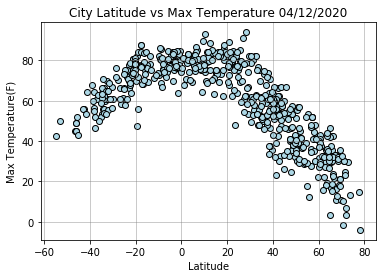

In [9]:
# Create a Scatter Plot for Max temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs Max Temperature 04/12/2020')
plt.savefig("../output_data/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

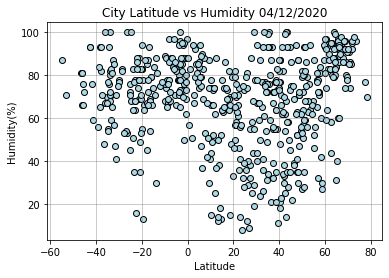

In [10]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs Humidity 04/12/2020')
plt.savefig("../output_data/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

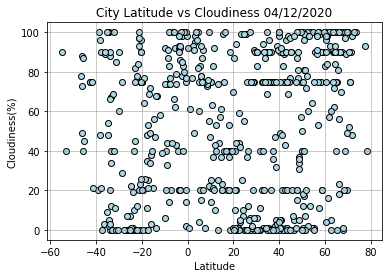

In [11]:
# Create a Scatter Plot for Clodiness vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness 04/12/2020')
plt.savefig("../output_data/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

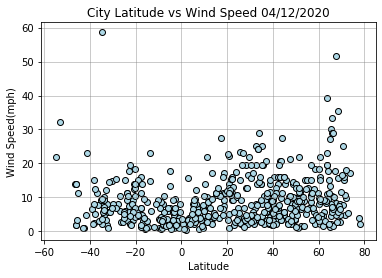

In [12]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs Wind Speed 04/12/2020')
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northerncities=weather_data.loc[weather_data["Lat"]>=0.0]
southerncities=weather_data.loc[weather_data["Lat"]<0.0]
northerncities.reset_index(inplace=True)
southerncities.reset_index(inplace=True)
southerncities.head()

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Vaini,20,TO,1586731535,69,-21.20,-175.20,80.60,9.17
1,2,Port Alfred,12,ZA,1586731535,82,-33.59,26.89,60.01,3.00
2,4,Talcahuano,3,CL,1586731536,48,-36.72,-73.12,60.80,11.41
3,5,Mar del Plata,90,AR,1586731362,82,-38.00,-57.56,64.40,14.99
4,7,New Norfolk,75,AU,1586731536,93,-42.78,147.06,55.99,1.12


In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearreg(x_val, y_val, x_label, y_label,posn, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,posn,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7759106741020252


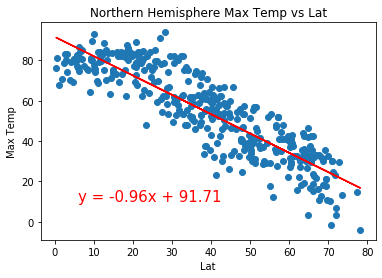

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a Scatter Plot for Max Temp vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Max Temp"]
x_label= "Lat"
y_label= "Max Temp"
posn=(6,10)
title="Northern Hemisphere Max Temp vs Lat"
linearreg(x_val, y_val, x_label, y_label, posn,title)
plt.savefig("../output_data/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.645442577426661


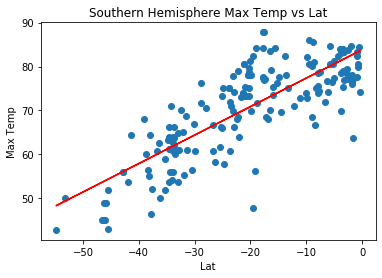

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a Scatter Plot for Max Temp vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Max Temp"]
x_label= "Lat"
y_label= "Max Temp"
posn=(-30,35)
title="Southern Hemisphere Max Temp vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07842661913785258


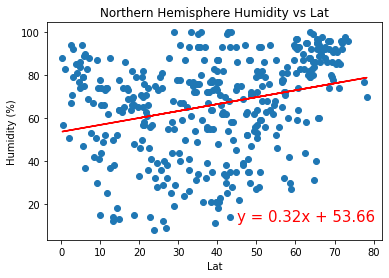

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a Scatter Plot for Humidity vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Humidity"]
x_label= "Lat"
y_label= "Humidity (%)"
posn=(45,12)
title="Northern Hemisphere Humidity vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017738209586478534


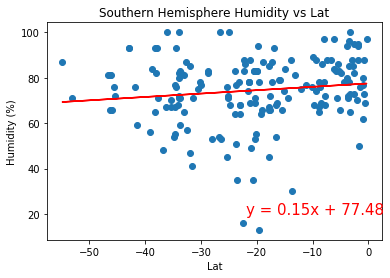

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a Scatter Plot for Humidity vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Humidity"]
x_label= "Lat"
y_label= "Humidity (%)"
posn=(-22,20)
title="Southern Hemisphere Humidity vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04425913599045879


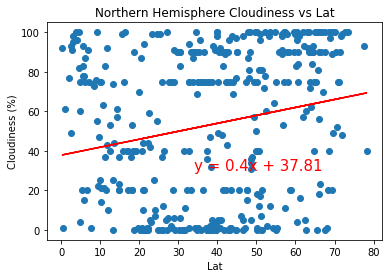

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a Scatter Plot for Cloudiness vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Cloudiness"]
x_label= "Lat"
y_label= "Cloudiness (%)"
posn=(34,30)
title="Northern Hemisphere Cloudiness vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029211500778257234


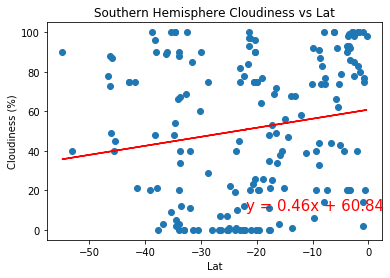

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a Scatter Plot for Cloudiness vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Cloudiness"]
x_label= "Lat"
y_label= "Cloudiness (%)"
posn=(-22,10)
title="Southern Hemisphere Cloudiness vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03334859721688067


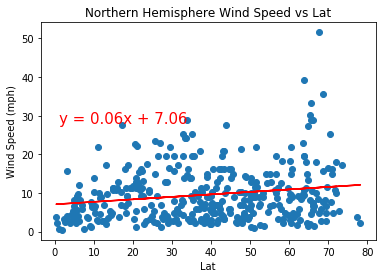

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a Scatter Plot for Wind Speed vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Wind Speed"]
x_label= "Lat"
y_label= "Wind Speed (mph)"
posn=(1,28)
title="Northern Hemisphere Wind Speed vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09278523845146987


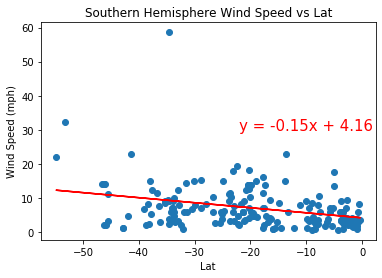

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a Scatter Plot for Wind Speed vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Wind Speed"]
x_label= "Lat"
y_label= "Wind Speed (mph)"
posn=(-22,30)
title="Southern Hemisphere Wind Speed vs Lat"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig12.png")